# PART #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

## In this task, we aim to comprehend the problem statement and the business case for building an AI Retention Model.

![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

# PART #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import requests
from io import BytesIO

In [2]:
# Define the URL of the zip file
zip_url = "https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P90-S2-Human-Resources-Data.zip"

# Make a request to download the zip file
response = requests.get(zip_url)

# Check if the request was successful
if response.status_code == 200:
    # Create a BytesIO object from the response content
    zip_data = BytesIO(response.content)

    # Create a ZipFile object from the BytesIO data
    with zipfile.ZipFile(zip_data) as zip_file:
        # List the files in the zip archive (optional)
        file_list = zip_file.namelist()
        print("Files in the zip archive:", file_list)

        # Extract the CSV file you want (assuming it's in the '1. Human Resources Data' folder)
        csv_filename = '1. Human Resources Data/Human_Resources.csv'
        with zip_file.open(csv_filename) as csv_file:
            # Read the CSV file into a DataFrame
            employee_df = pd.read_csv(csv_file)

    # Now, 'employee_df' contains your data from the CSV file
    print(employee_df.head())  # Display the first few rows of the DataFrame
else:
    print("Failed to download the zip file.")

Files in the zip archive: ['1. Human Resources Data/', '1. Human Resources Data/HumanResources_slides.pptx', '1. Human Resources Data/Human_Resources.csv']
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   

In [3]:
# Additional Information:
employee_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
int64_columns = employee_df.select_dtypes(include=['int64'])
len(int64_columns.columns)

26

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# PART #3: VISUALIZE DATASET

In [7]:
employee_df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [8]:
# Let's replace 'Attrition' , 'OverTime' , 'Over18' column with integers before performing any visualizations
employee_df["Attrition"] = employee_df["Attrition"].apply(lambda x:1 if x=='Yes' else 0)
employee_df["OverTime"] = employee_df["OverTime"].apply(lambda x:1 if x=='Yes' else 0)
employee_df["Over18"] = employee_df["Over18"].apply(lambda x:1 if x=='Y' else 0)

employee_df[['Attrition', 'OverTime', 'Over18']].sum()

Attrition     237
OverTime      416
Over18       1470
dtype: int64

In [9]:
# Check for missing data
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

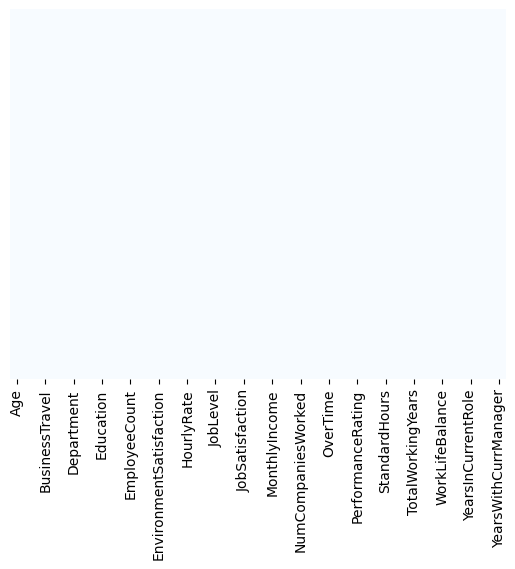

In [10]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

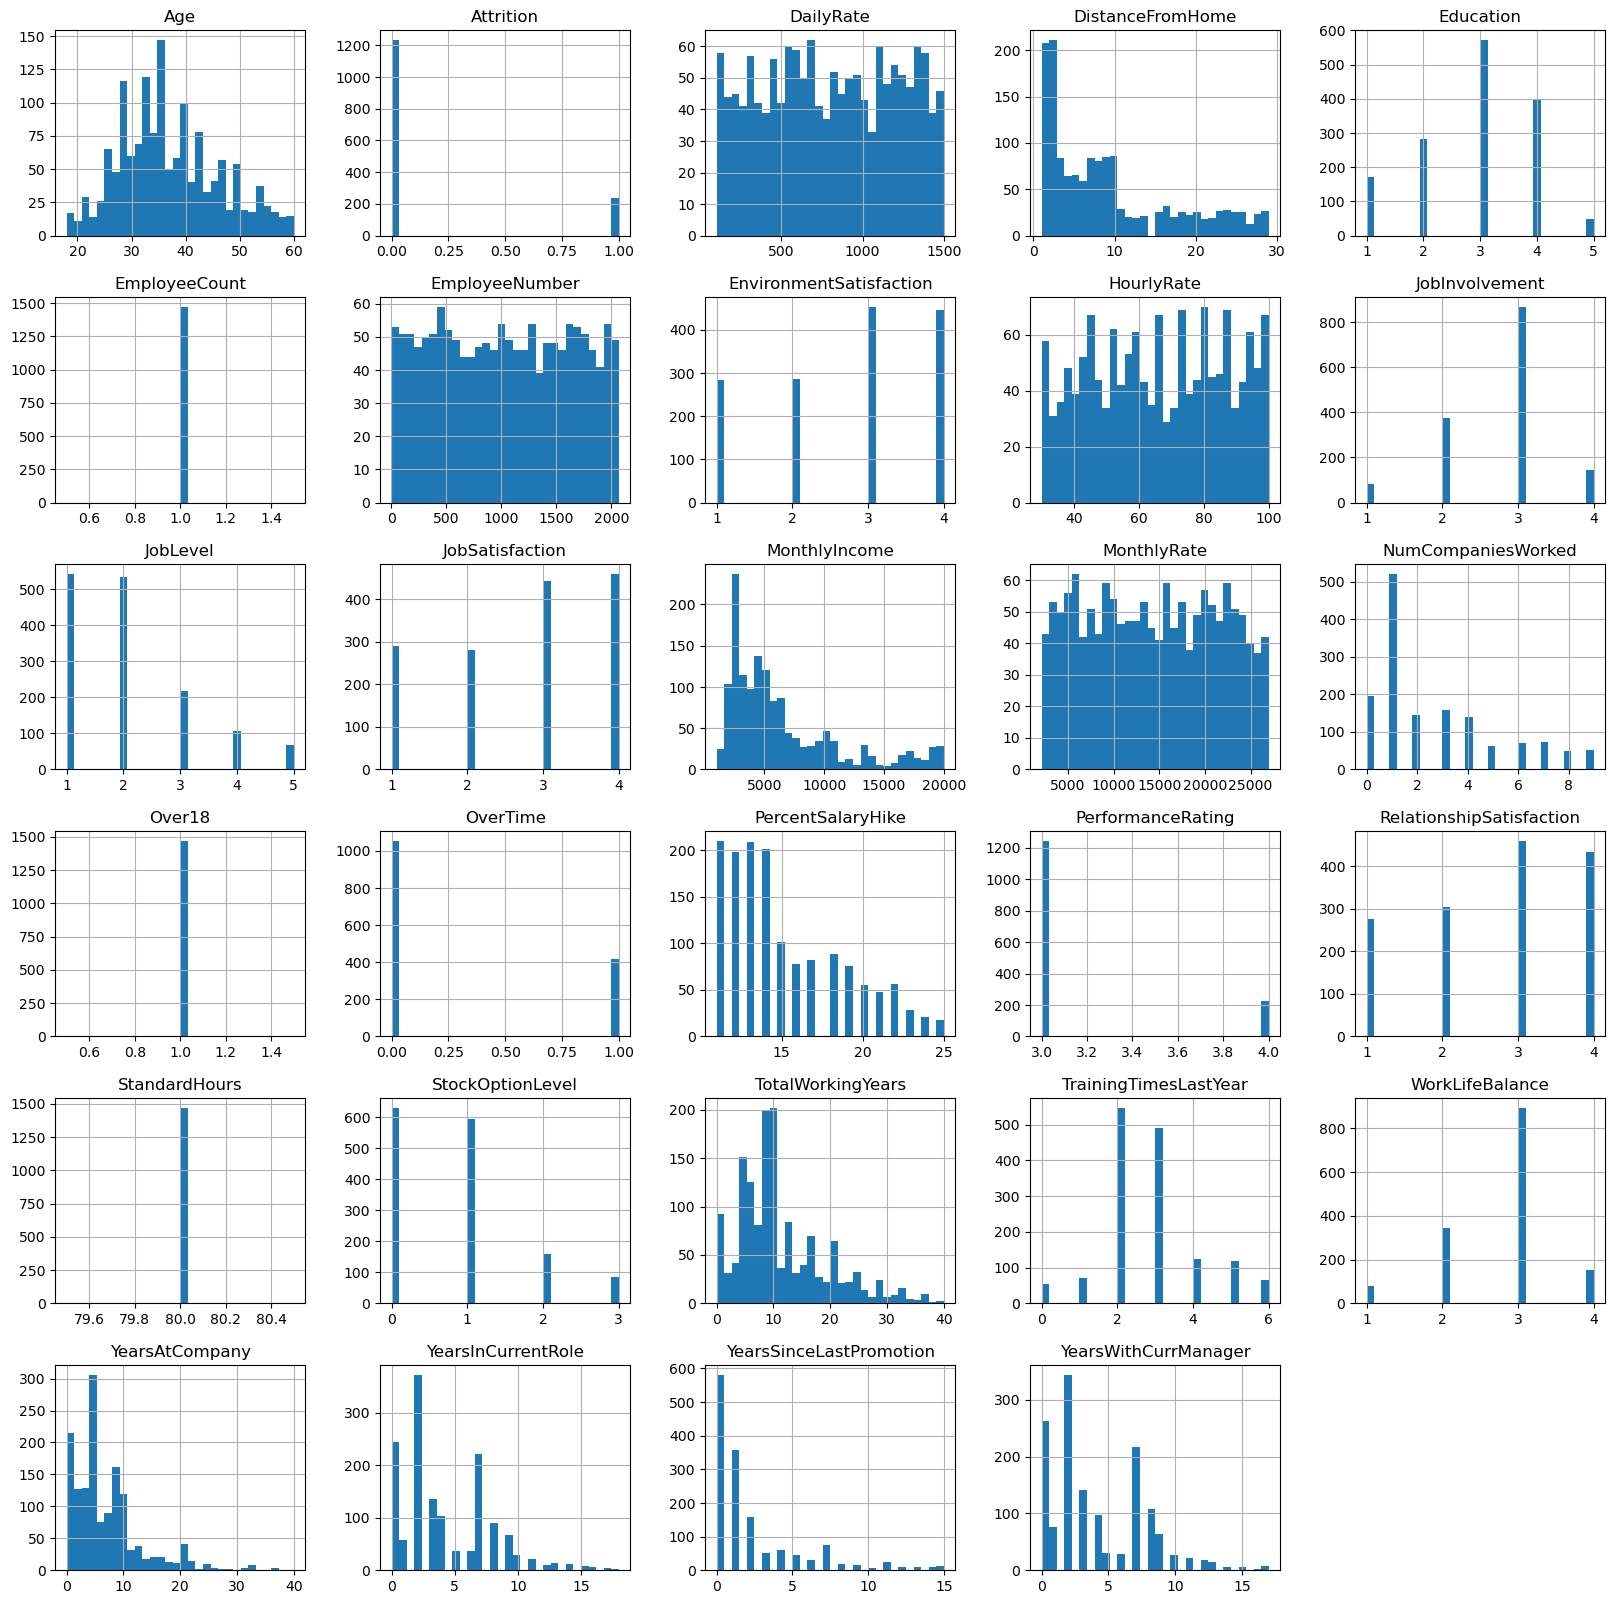

In [11]:
# Visualize data distribution for some features
employee_df.hist(bins=30, figsize=(20,20))
plt.show()

In [12]:
# Drop columns that do not contribute significantly
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
employee_df.drop(columns_to_drop, axis=1, inplace=True)
len(employee_df.columns)

31

In [13]:
# Analyze the attrition rate
left_df = employee_df[employee_df.Attrition == 1]
stayed_df = employee_df[employee_df.Attrition == 0]

print(f'Employees left the company {left_df.shape[0]}, which is {round(left_df.shape[0]/employee_df.shape[0]* 100, 2)}%')
print(f'Employees stayed at the company {stayed_df.shape[0]}, which is {round(stayed_df.shape[0]/employee_df.shape[0]* 100, 2)}%')

Employees left the company 237, which is 16.12%
Employees stayed at the company 1233, which is 83.88%


In [14]:
# Compare the statistics of employees who stayed and left
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [15]:
# Compare the statistics of employees who stayed and left
stayed_df.describe()
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

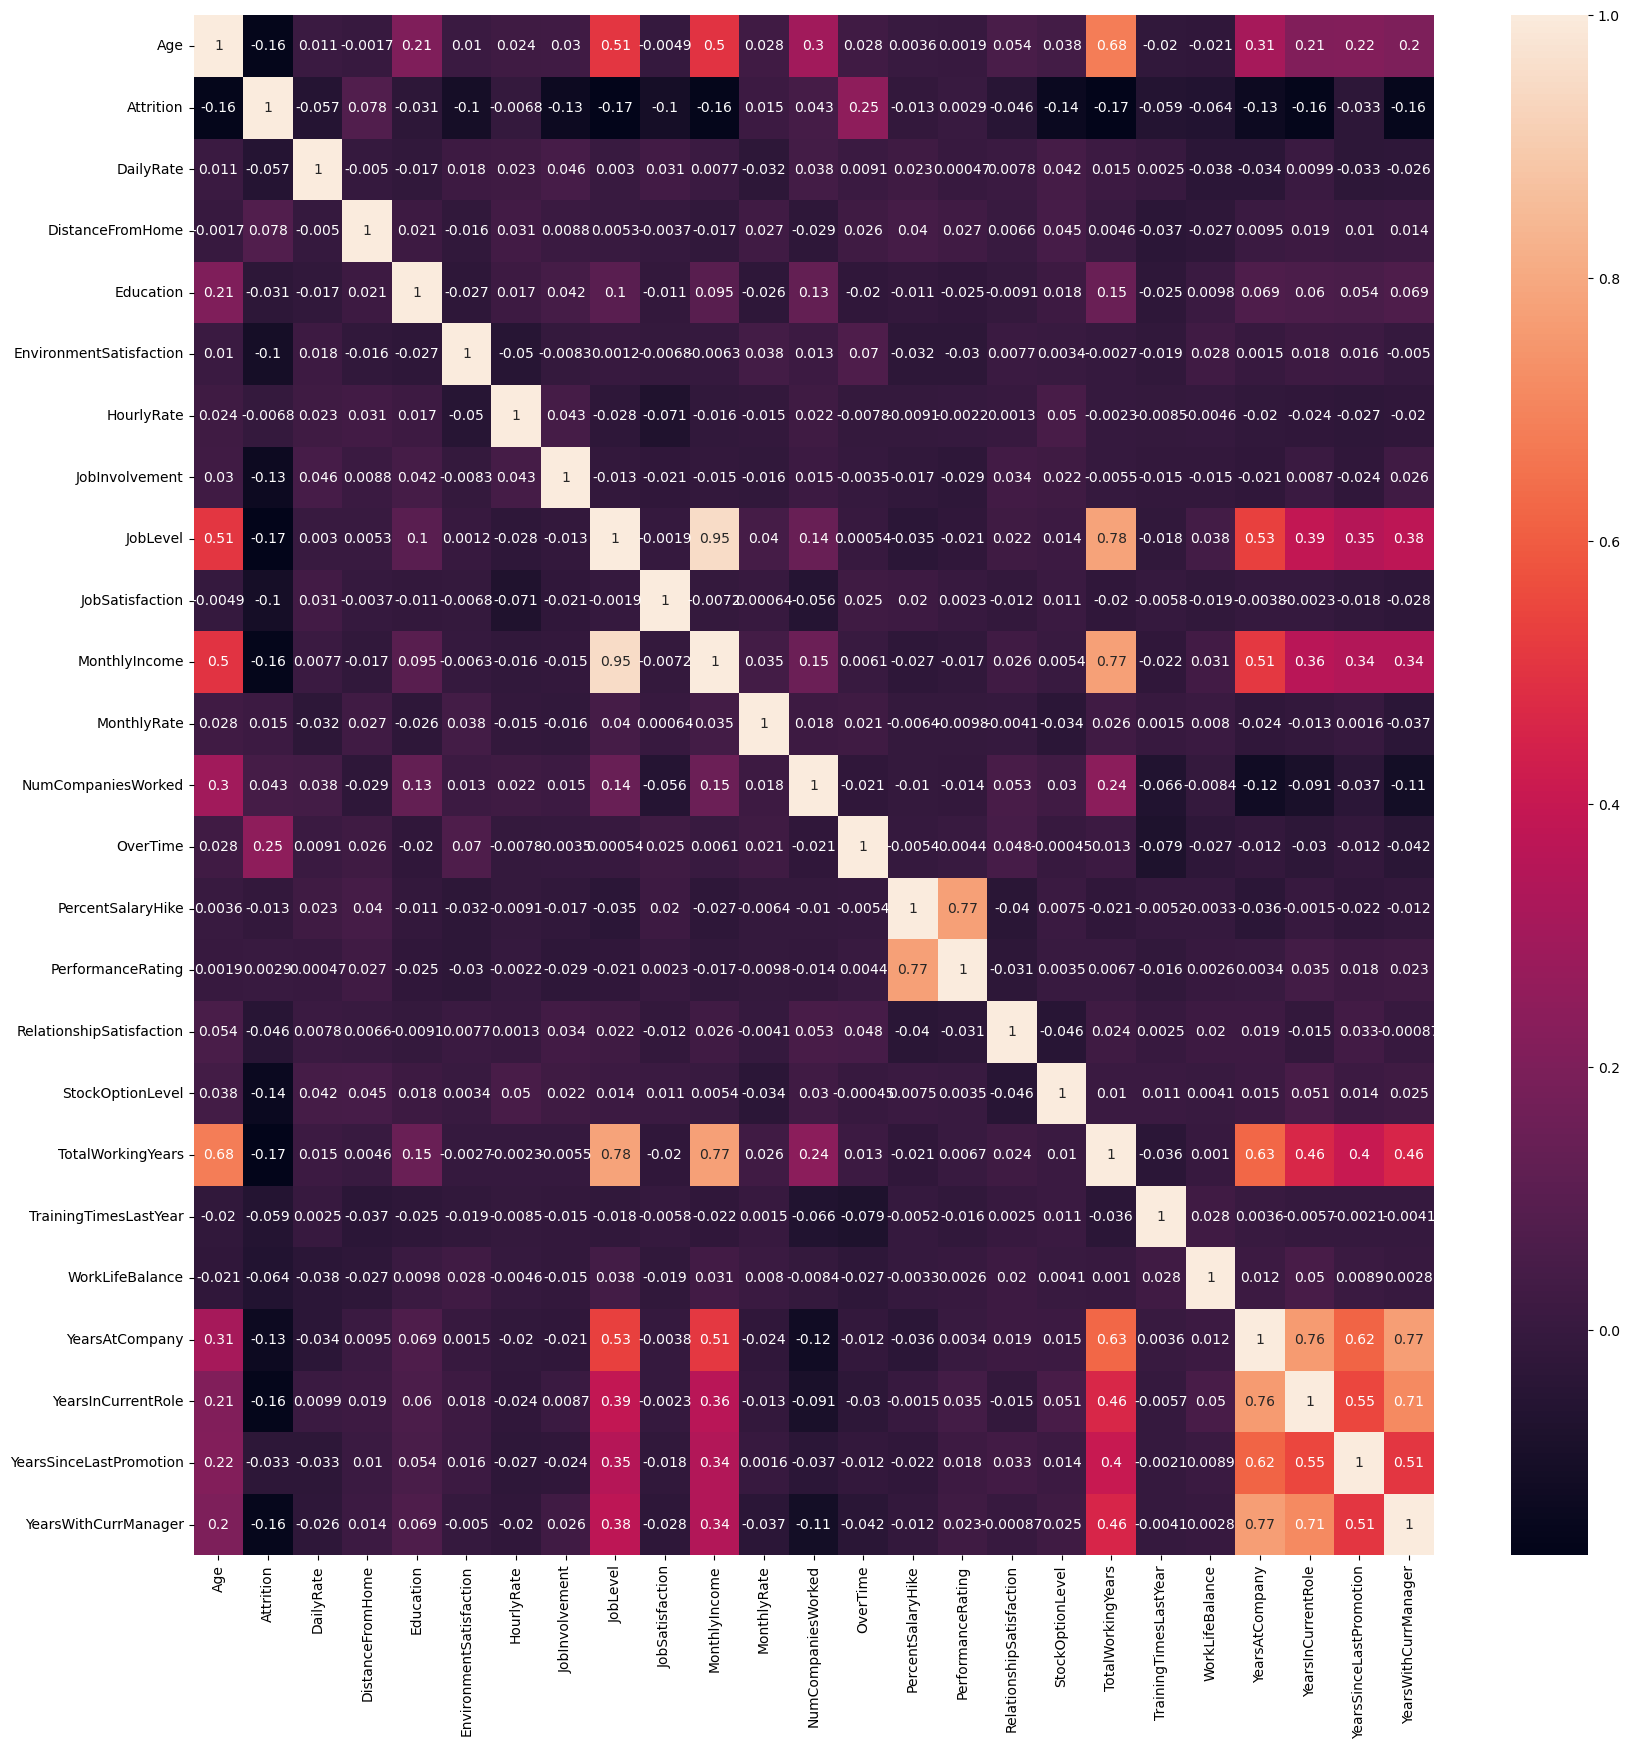

In [16]:
# Visualize correlations between features
correlations = employee_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

<AxesSubplot:xlabel='Age', ylabel='count'>

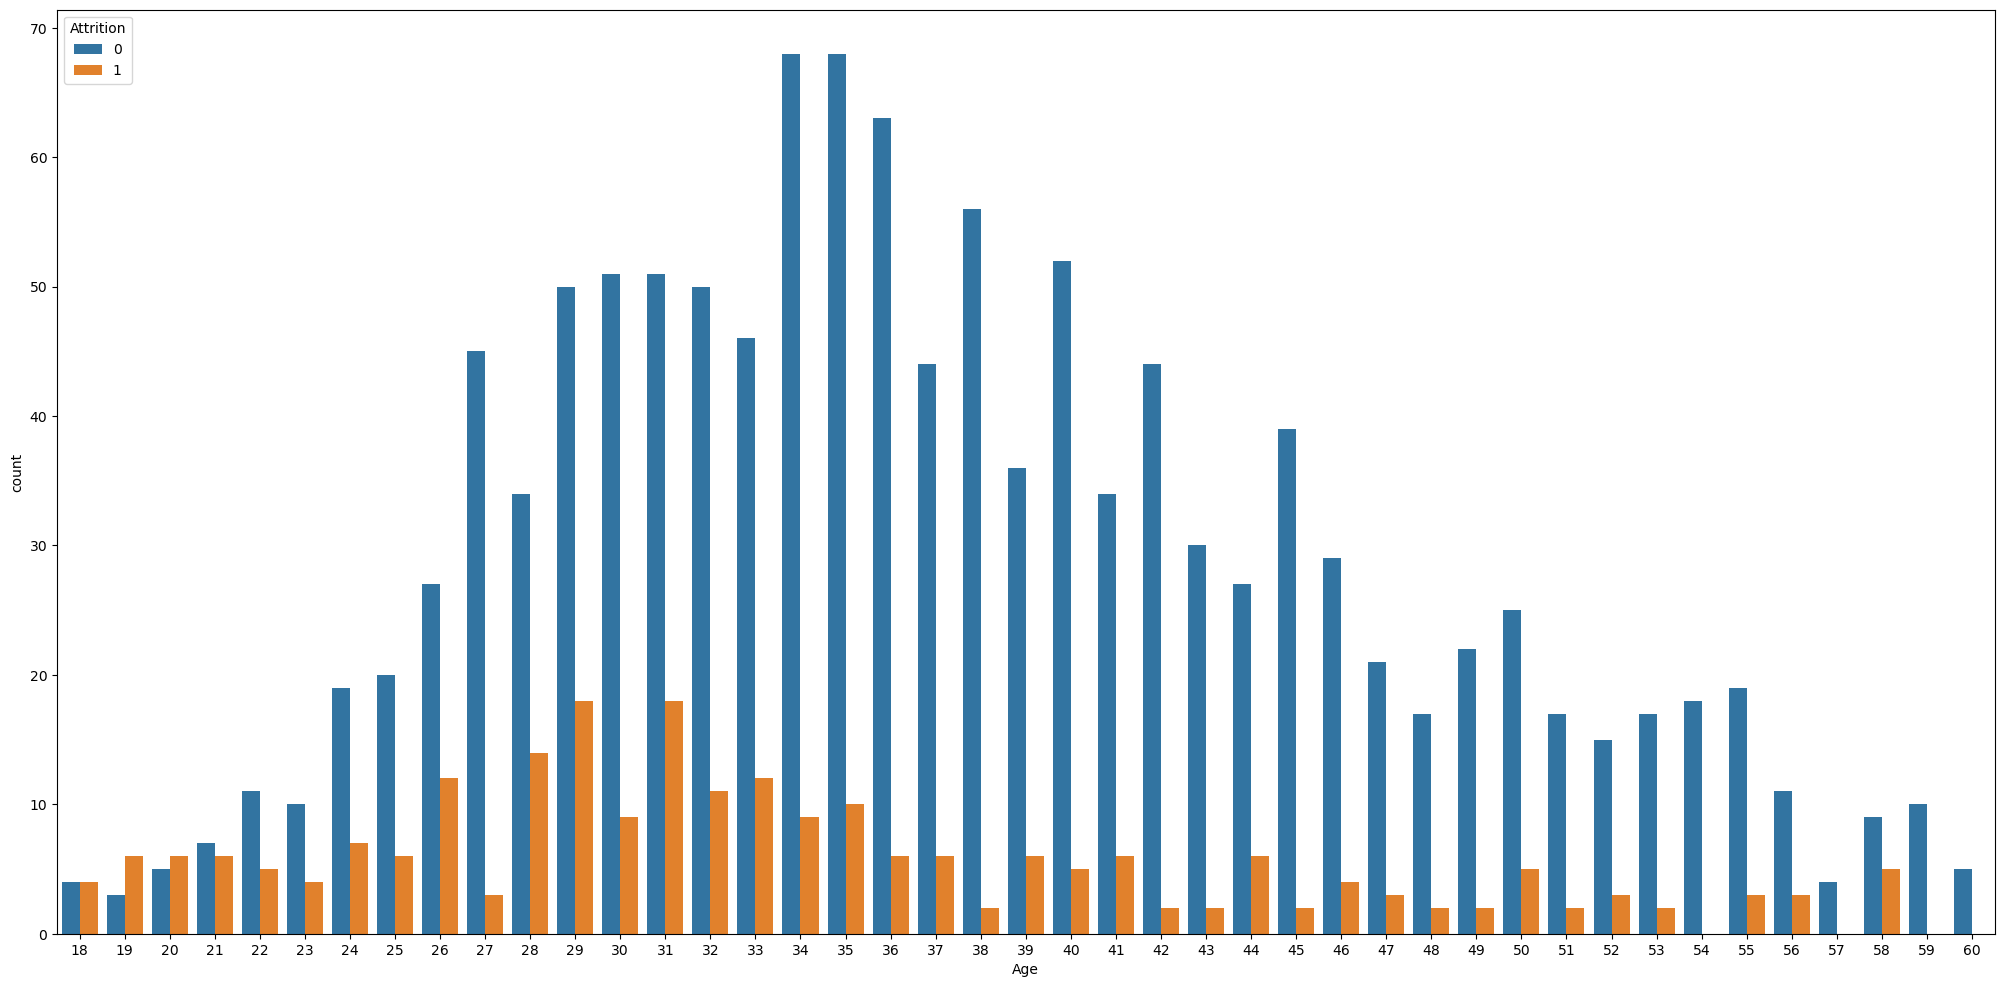

In [17]:
# Analyze specific factors
plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

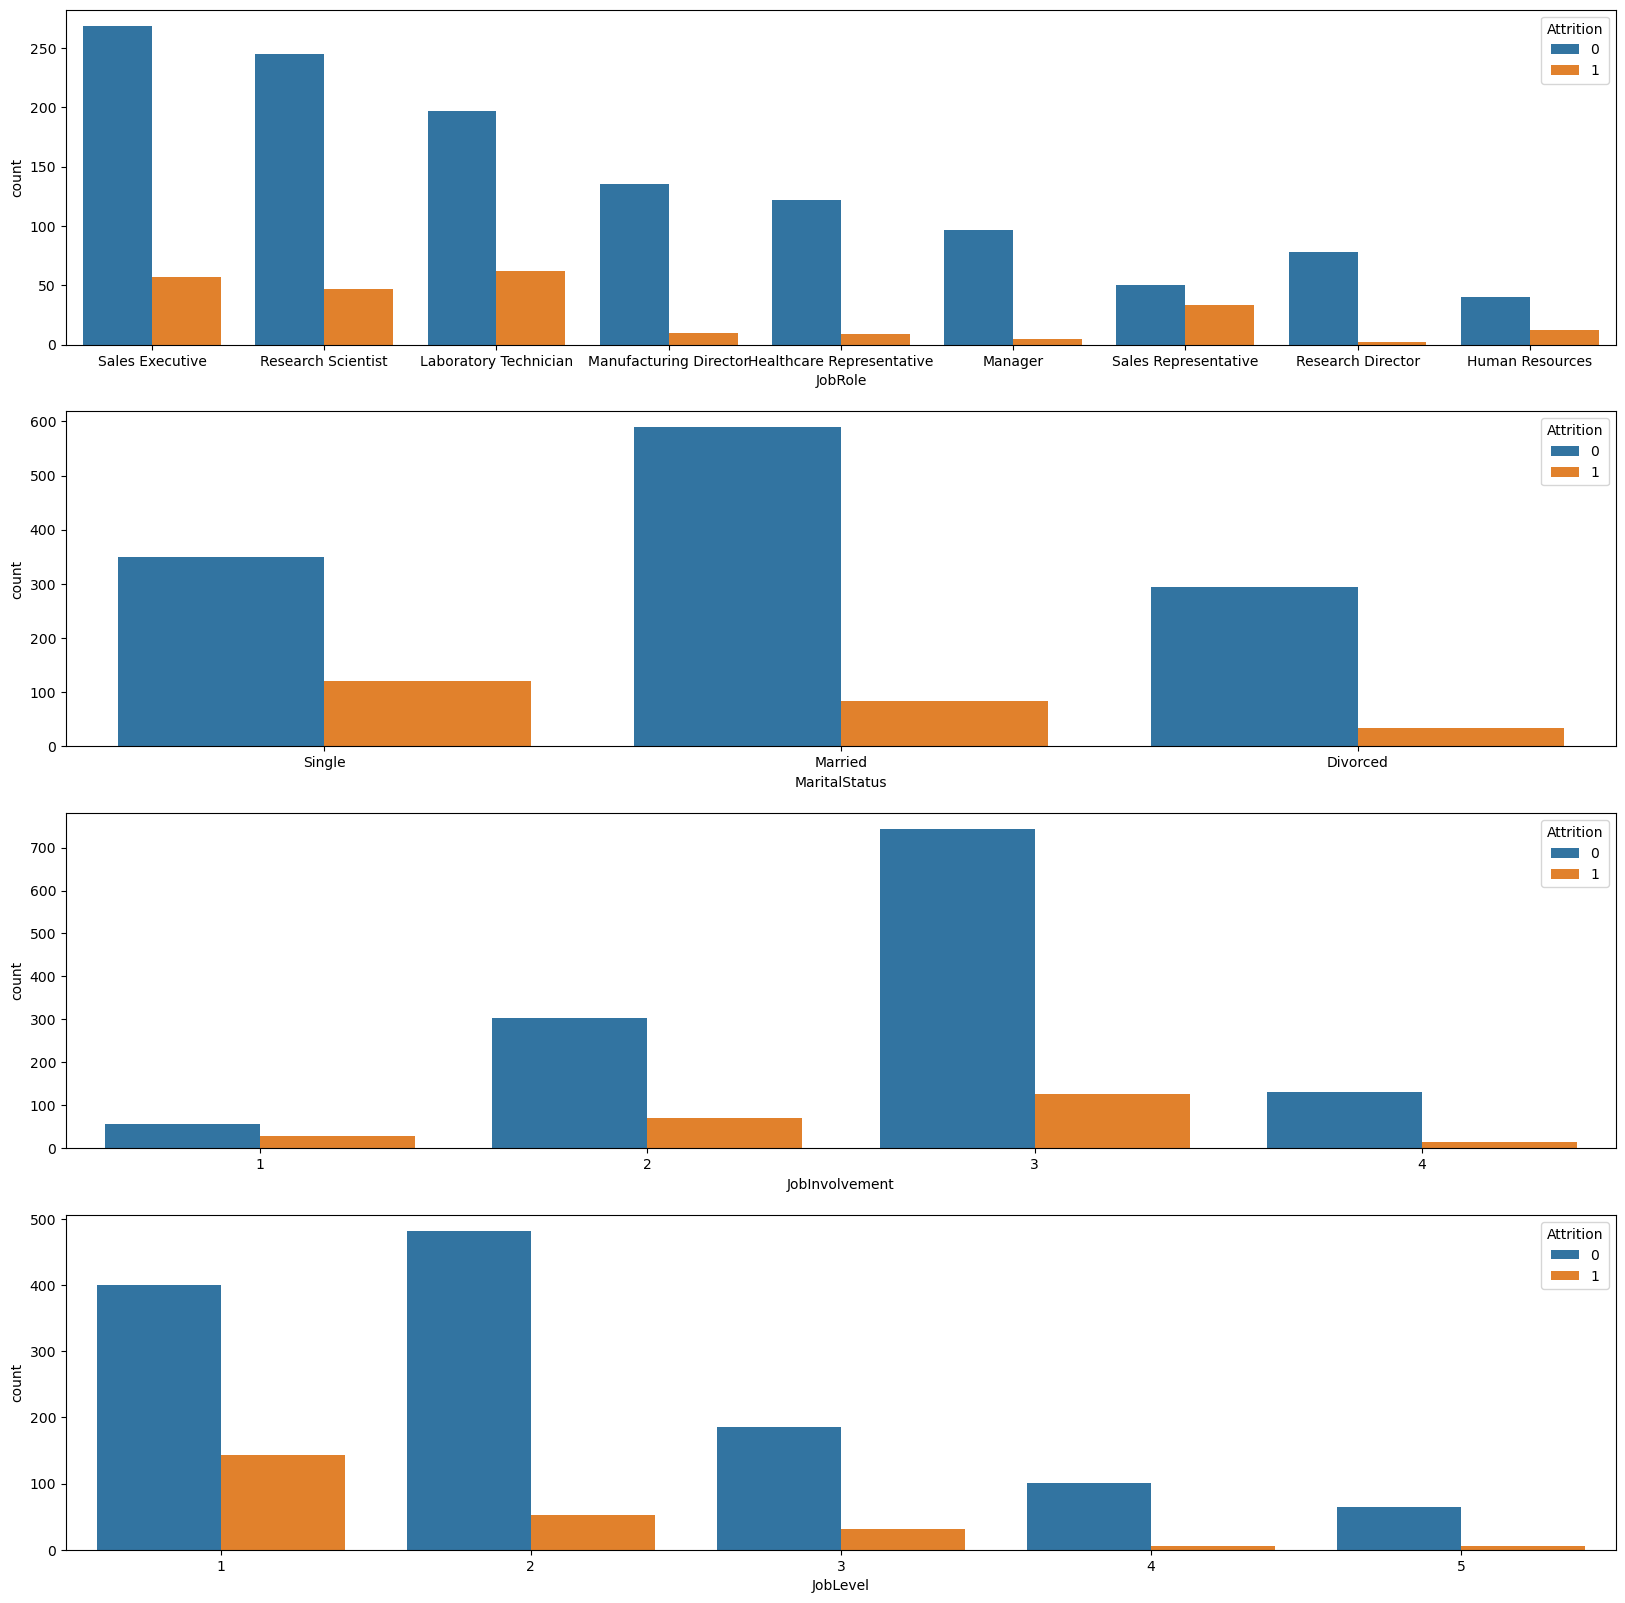

In [18]:
# Create subplots to visualize data distribution for different factors
plt.figure(figsize = (20,20))

plt.subplot(4,1,1)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)

plt.subplot(4,1,2)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)

plt.subplot(4,1,3)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)

plt.subplot(4,1,4)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)
          
# Notes:
# - These subplots display the count of employees in each job role, marital status, job involvement level, and job level,
#   with a distinction between those who left ('Attrition' = 1) and those who stayed ('Attrition' = 0).

# Single employees tend to leave compared to married and divorced
# Sales Representatives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

Text(0.5, 0, 'Distance From Home')

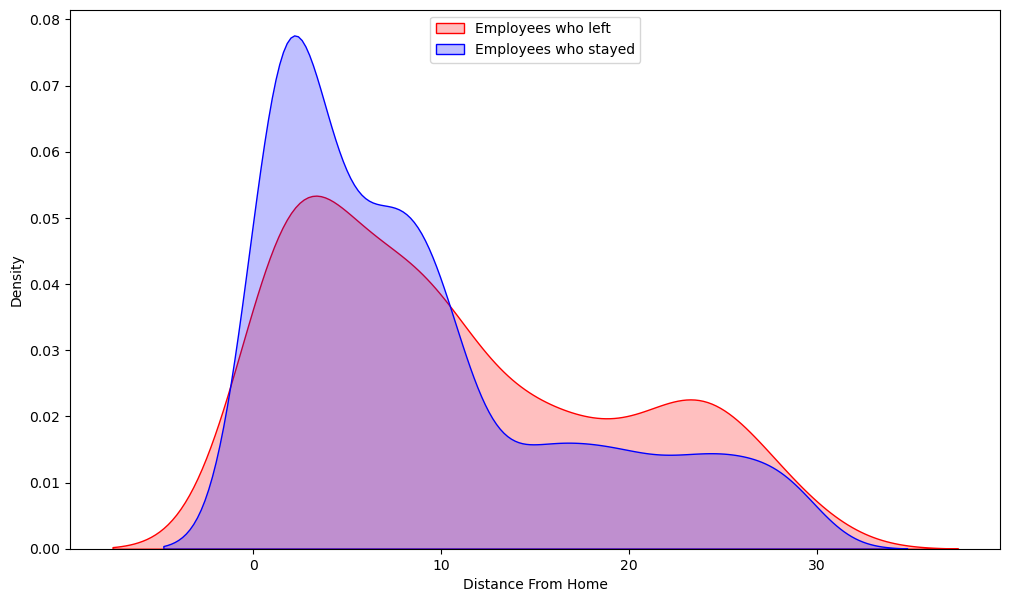

In [19]:
# Create KDE plots to analyze the distribution of 'DistanceFromHome', 'YearsWithCurrManager', and 'TotalWorkingYears'
plt.figure(figsize = (12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', shade = True, color = 'b')
plt.legend(loc='upper center')
plt.xlabel('Distance From Home')
# Notes:
# - These KDE plots compare the distribution of 'DistanceFromHome' for employees who left and stayed.
# - Employees who left tend to have a peak at higher distances from home.

Text(0.5, 0, 'Years With Current Manager')

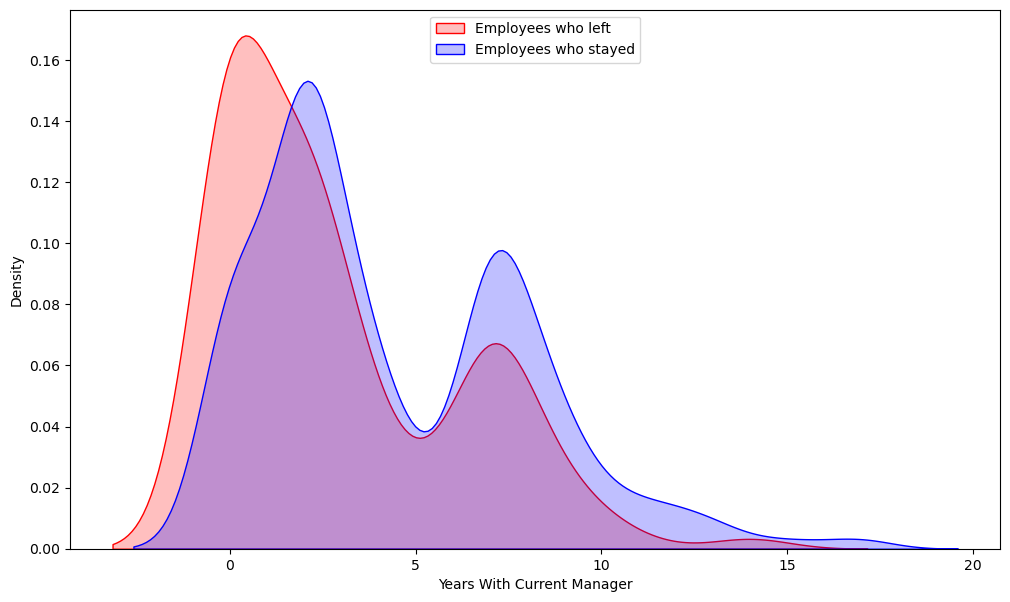

In [20]:
plt.figure(figsize = (12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', shade = True, color = 'b')
plt.legend(loc='upper center')
plt.xlabel('Years With Current Manager')

Text(0.5, 0, 'Total Working Years')

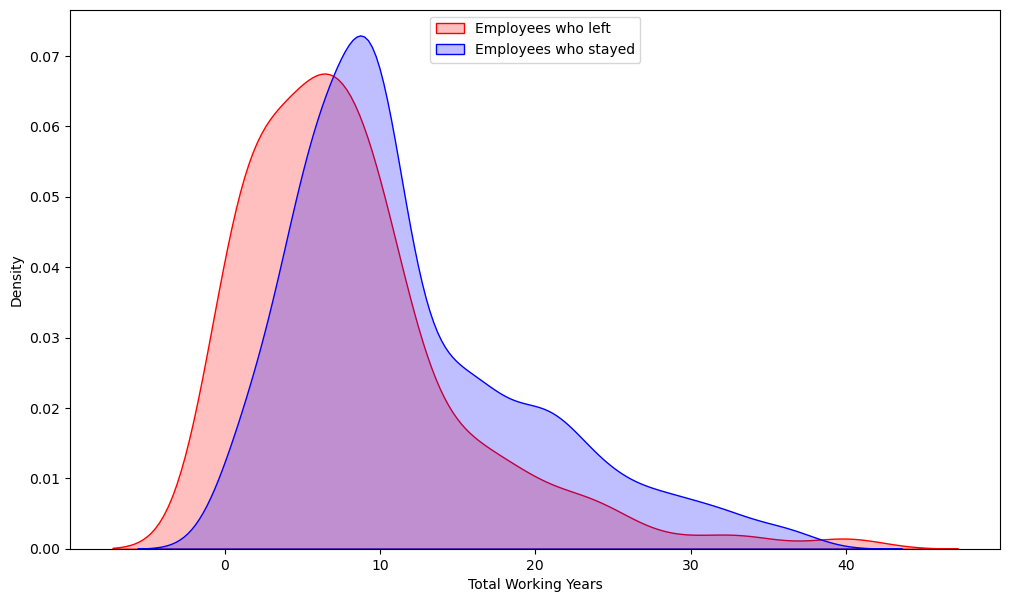

In [21]:
plt.figure(figsize = (12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', shade = True, color = 'b')
plt.legend(loc='upper center')
plt.xlabel('Total Working Years')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

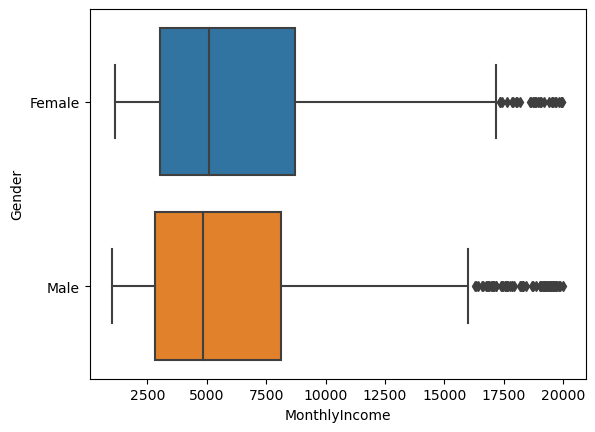

In [22]:
# Create box plots to visualize the impact of gender and job role on monthly income
sns.boxplot(data = employee_df,
            x = 'MonthlyIncome',
            y = 'Gender')
# Notes:
# - The first box plot compares the distribution of monthly income for different genders.
# - The second box plot compares the distribution of monthly income for various job roles.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

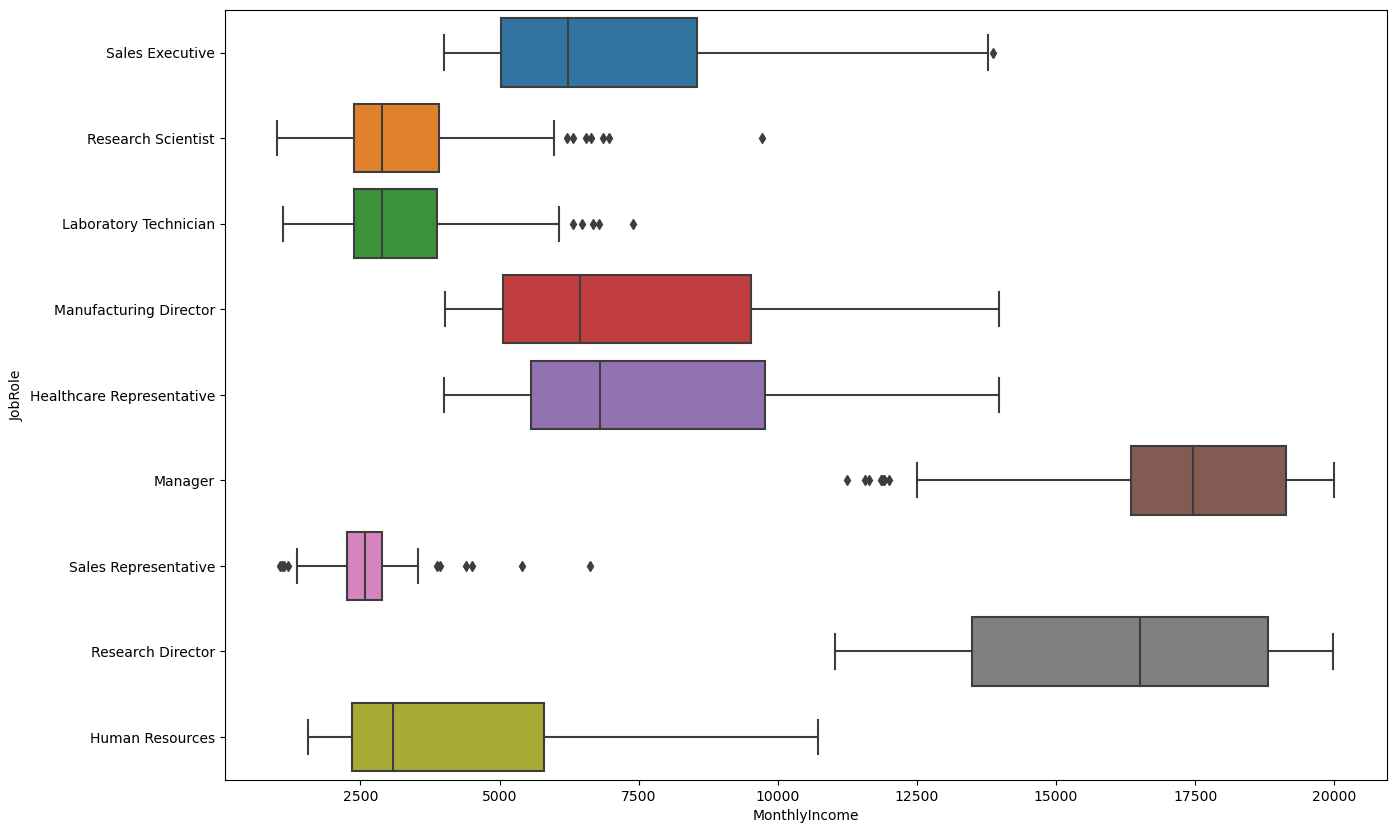

In [23]:
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(data = employee_df,
            x = 'MonthlyIncome',
            y = 'JobRole')

# PART #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA PREPROCESSING

In [24]:
# Separate categorical features ('X_cat') and numerical features ('X_numerical')
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [25]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [26]:
# Perform one-hot encoding on categorical features ('X_cat')
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Concatenate one-hot encoded categorical features and numerical features
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [28]:
# Normalize the feature values using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [29]:
# Define the target variable 'y' (Attrition)
y = employee_df['Attrition']

# PART #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# PART #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# PART #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [30]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
X_train.shape

(1102, 50)

In [32]:
X_test.shape

(368, 50)

In [33]:
# Import the LogisticRegression model and accuracy metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
# Initialize a Logistic Regression model
model = LogisticRegression()

In [35]:
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
X_train

array([[0.        , 0.        , 1.        , ..., 0.11111111, 0.13333333,
        0.05882353],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.23529412],
       [0.        , 0.        , 1.        , ..., 0.61111111, 0.33333333,
        0.52941176],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.06666667,
        0.11764706],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.52941176],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.        ,
        0.41176471]])

In [37]:
# Get the intercept and coefficients of the logistic regression model
intercept = model.intercept_[0]

# Get the coefficients (b1, b2, ..., bn)
coefficients = model.coef_[0]

# Display the logistic regression formula
print(f"Formula: log(odds of success) = {intercept:.4f} + ", end="")
for i, coef in enumerate(coefficients):
    if i == 0:
        print(f"({coef:.4f} * x{i+1})", end="")
    else:
        print(f" + ({coef:.4f} * x{i+1})", end="")
print()

Formula: log(odds of success) = 1.6030 + (-0.7923 * x1) + (0.8742 * x2) + (-0.0820 * x3) + (0.0133 * x4) + (-0.1965 * x5) + (0.1831 * x6) + (0.4191 * x7) + (-0.2275 * x8) + (0.0379 * x9) + (-0.3953 * x10) + (-0.4521 * x11) + (0.6178 * x12) + (-0.2245 * x13) + (0.2244 * x14) + (-0.5303 * x15) + (0.4528 * x16) + (0.6339 * x17) + (0.1088 * x18) + (-0.3189 * x19) + (-1.2441 * x20) + (-0.1067 * x21) + (0.1760 * x22) + (0.8284 * x23) + (-0.3226 * x24) + (-0.3212 * x25) + (0.6438 * x26) + (-1.3825 * x27) + (-0.4018 * x28) + (1.2043 * x29) + (0.1720 * x30) + (-1.1915 * x31) + (0.0118 * x32) + (-1.1347 * x33) + (-0.4134 * x34) + (-1.0128 * x35) + (-0.7005 * x36) + (0.0453 * x37) + (1.2595 * x38) + (1.7504 * x39) + (-0.2726 * x40) + (0.2669 * x41) + (-0.7235 * x42) + (-0.3344 * x43) + (-0.8756 * x44) + (-0.9636 * x45) + (-1.1481 * x46) + (0.0099 * x47) + (-1.6908 * x48) + (1.6325 * x49) + (-0.8477 * x50)


In [38]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

In [39]:
# Testing Set Performance
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
# Calculate the accuracy of the logistic regression model on the test set
from sklearn.metrics import confusion_matrix, classification_report
print('Accuracy {}%'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 88.04347826086956%


<AxesSubplot:>

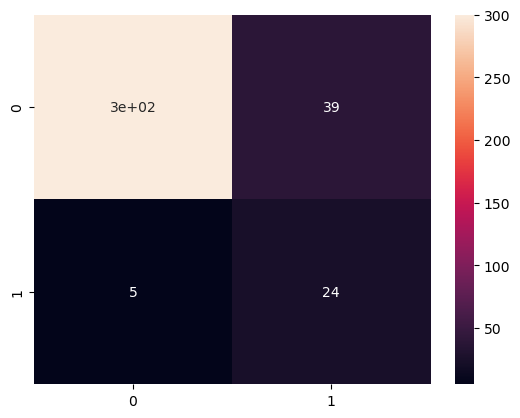

In [41]:
# Create a confusion matrix to evaluate the model's performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [42]:
# Generate a classification report to assess the precision, recall, and F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       305
           1       0.83      0.38      0.52        63

    accuracy                           0.88       368
   macro avg       0.86      0.68      0.73       368
weighted avg       0.88      0.88      0.86       368



In [43]:
# Make predictions on the entire dataset
prediction = model.predict(X)
prediction.sum()

121

In [44]:
y.sum()

237

# PART #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [45]:
# Import the Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Use the trained Random Forest model to make predictions on the test set
y_pred = model.predict(X_test)

<AxesSubplot:>

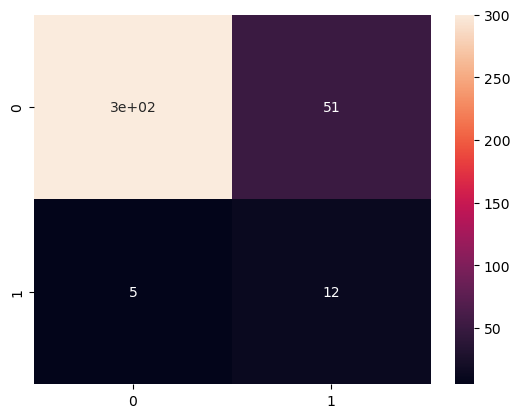

In [47]:
# Evaluate the Random Forest Classifier's performance using a confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [48]:
# Generate a classification report to assess precision, recall, and F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       305
           1       0.71      0.19      0.30        63

    accuracy                           0.85       368
   macro avg       0.78      0.59      0.61       368
weighted avg       0.83      0.85      0.81       368



# PART #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [49]:
# Import TensorFlow for deep learning
import tensorflow as tf

In [50]:
# Create a deep learning model using TensorFlow's Sequential API
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [51]:
# Display a summary of the deep learning model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527001 (2.01 MB)
Trainable params: 527001 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Compile the deep learning model, specifying optimizer and loss function
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [53]:
# Train the deep learning model on the training data
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 22ms/step - loss: 0.4336 - accuracy: 0.8412
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3314 - accuracy: 0.8621
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3149 - accuracy: 0.8657
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2748 - accuracy: 0.8902
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.9102
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2017 - accuracy: 0.9292
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1698 - accuracy: 0.9401
Epoch 8/100
23/23 [==============================] - 0s 16ms/step - loss: 0.2268 - accuracy: 0.9120
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1424 - accuracy: 0.9483
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1642 - accuracy: 0.9383
Epoch 1

23/23 [==============================] - 0s 9ms/step - loss: 3.8039e-06 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 9ms/step - loss: 3.6712e-06 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 9ms/step - loss: 3.5569e-06 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 9ms/step - loss: 3.4343e-06 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 8ms/step - loss: 3.3154e-06 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 8ms/step - loss: 3.2150e-06 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 9ms/step - loss: 3.1079e-06 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 9ms/step - loss: 3.0112e-06 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 9ms/step - loss: 2.9190e-06 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 8ms/step - loss: 2.8

In [54]:
# Use the trained deep learning model to make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

12/12 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [55]:
# Get the keys available in the training history
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

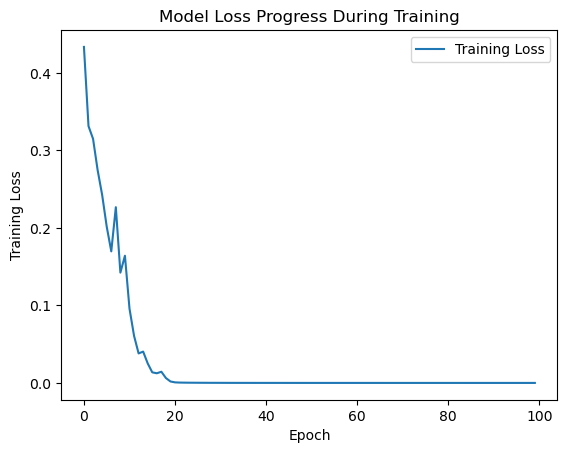

In [56]:
# Plot the training loss over epochs to monitor model convergence
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

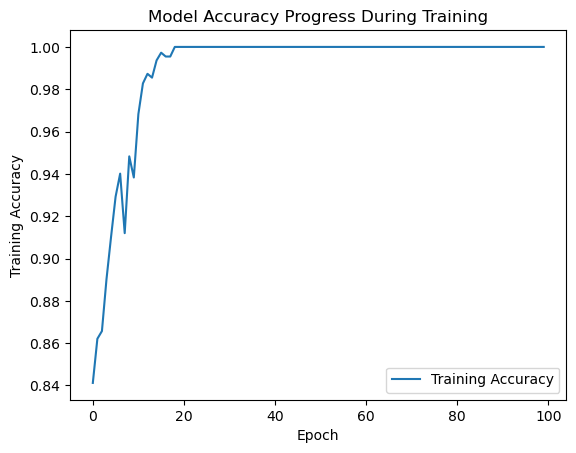

In [57]:
# Plot the training accuracy over epochs to monitor model convergence
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

<AxesSubplot:>

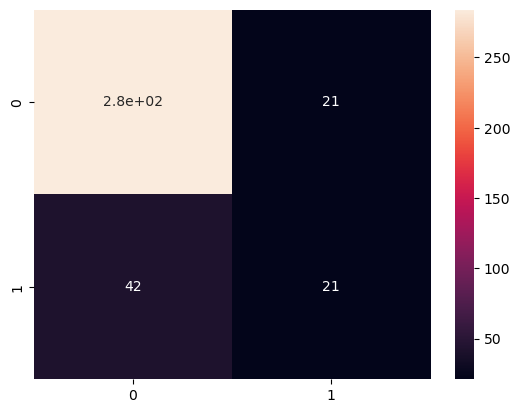

In [58]:
# Evaluate the deep learning model's performance on the test set
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [59]:
# Generate a classification report to assess the deep learning model's precision, recall, and F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       305
           1       0.50      0.33      0.40        63

    accuracy                           0.83       368
   macro avg       0.69      0.63      0.65       368
weighted avg       0.81      0.83      0.81       368

